In [1]:
import altair as alt
import numpy as np
import pandas as pd
import requests
from vega_datasets import data


pd.set_option('display.max_columns', None)
alt.data_transformers.enable('json')

DataTransformerRegistry.enable('json')

## Get health and geocode data

### health data

In [2]:
df = pd.read_csv("../data/WHO_life_expectancy_data_clean.csv")

In [3]:
df.head()

,Unnamed: 0,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under_five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness_1_19_years,thinness_5_9_years,income_composition_of_resources,schooling
0,0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


### extra geocode data

In [4]:
def get_world_info():
    """Create a dataframe of world info with country information
    
    Returns:
        [pd.DataFrame] -- DataFrame containing a listing of countries and associated information
    """    
    world_info = requests.get("https://restcountries.eu/rest/v2/all")
    world_info_df = pd.DataFrame(world_info.json())
    world_info_df["name"] = world_info_df["name"].str.lower().str.strip()
    world_info_df["numericCode"] = world_info_df["numericCode"].astype(float)
    world_info_df["numericCode"] = world_info_df["numericCode"].fillna(0).astype(int)
    return world_info_df

In [5]:
world_info_df = get_world_info()
world_info_df.head()

,name,topLevelDomain,alpha2Code,alpha3Code,callingCodes,capital,altSpellings,region,subregion,population,latlng,demonym,area,gini,timezones,borders,nativeName,numericCode,currencies,languages,translations,flag,regionalBlocs,cioc
0,afghanistan,[.af],AF,AFG,[93],Kabul,"[AF, Afġānistān]",Asia,Southern Asia,27657145,"[33.0, 65.0]",Afghan,652230.0,27.8,[UTC+04:30],"[IRN, PAK, TKM, UZB, TJK, CHN]",افغانستان,4,"[{'code': 'AFN', 'name': 'Afghan afghani', 'sy...","[{'iso639_1': 'ps', 'iso639_2': 'pus', 'name':...","{'de': 'Afghanistan', 'es': 'Afganistán', 'fr'...",https://restcountries.eu/data/afg.svg,"[{'acronym': 'SAARC', 'name': 'South Asian Ass...",AFG
1,åland islands,[.ax],AX,ALA,[358],Mariehamn,"[AX, Aaland, Aland, Ahvenanmaa]",Europe,Northern Europe,28875,"[60.116667, 19.9]",Ålandish,1580.0,NaN,[UTC+02:00],[],Åland,248,"[{'code': 'EUR', 'name': 'Euro', 'symbol': '€'}]","[{'iso639_1': 'sv', 'iso639_2': 'swe', 'name':...","{'de': 'Åland', 'es': 'Alandia', 'fr': 'Åland'...",https://restcountries.eu/data/ala.svg,"[{'acronym': 'EU', 'name': 'European Union', '...",
2,albania,[.al],AL,ALB,[355],Tirana,"[AL, Shqipëri, Shqipëria, Shqipnia]",Europe,Southern Europe,2886026,"[41.0, 20.0]",Albanian,28748.0,34.5,[UTC+01:00],"[MNE, GRC, MKD, KOS]",Shqipëria,8,"[{'code': 'ALL', 'name': 'Albanian lek', 'symb...","[{'iso639_1': 'sq', 'iso639_2': 'sqi', 'name':...","{'de': 'Albanien', 'es': 'Albania', 'fr': 'Alb...",https://restcountries.eu/data/alb.svg,"[{'acronym': 'CEFTA', 'name': 'Central Europea...",ALB
3,algeria,[.dz],DZ,DZA,[213],Algiers,"[DZ, Dzayer, Algérie]",Africa,Northern Africa,40400000,"[28.0, 3.0]",Algerian,2381741.0,35.3,[UTC+01:00],"[TUN, LBY, NER, ESH, MRT, MLI, MAR]",الجزائر,12,"[{'code': 'DZD', 'name': 'Algerian dinar', 'sy...","[{'iso639_1': 'ar', 'iso639_2': 'ara', 'name':...","{'de': 'Algerien', 'es': 'Argelia', 'fr': 'Alg...",https://restcountries.eu/data/dza.svg,"[{'acronym': 'AU', 'name': 'African Union', 'o...",ALG
4,american samoa,[.as],AS,ASM,[1684],Pago Pago,"[AS, Amerika Sāmoa, Amelika Sāmoa, Sāmoa Amelika]",Oceania,Polynesia,57100,"[-14.33333333, -170.0]",American Samoan,199.0,NaN,[UTC-11:00],[],American Samoa,16,"[{'code': 'USD', 'name': 'United State Dollar'...","[{'iso639_1': 'en', 'iso639_2': 'eng', 'name':...","{'de': 'Amerikanisch-Samoa', 'es': 'Samoa Amer...",https://restcountries.eu/data/asm.svg,[],ASA


## Heat Map

### tidy data

In [6]:
def make_map_data(df, year_range=None):
    """Creates a clean data frame to be used for plotting with altair maps
    
    Arguments:
        df {pd.DataFrame} -- Raw data frame of health data
    
    Keyword Arguments:
        year_range {list} -- List of length 2 containing year range (default: {None}) (for example: `[2012, 2015]`)
    
    Returns:
        [pd.DataFrame] -- Clean and tidy DataFrame that can be plotted with Altair maps
    """    
    # filter on year range
    if year_range != None:
        df = df[(df["year"] >= year_range[0]) & (df["year"] <= year_range[1])]

    # aggregate and tidy data
    df = (
        df.loc[:, ["country", "status", "life_expectancy", "gdp"]].groupby(["country", "status"])
          .agg("mean")
          .reset_index()
    )
    df["gdp_log"] = np.log(df["gdp"])

    # clean columns for lookup
    df["country"] = df["country"].str.lower().str.strip()

    # clean country names for lookup
    df["country"] = df["country"].str.replace("czechia", "czech republic")
    df["country"] = df["country"].str.replace("democratic people's republic of korea", "korea (democratic people's republic of)") # north korea
    df["country"] = df["country"].str.replace("democratic republic of the congo", "congo (democratic republic of the)")
    df["country"] = df["country"].str.replace("republic of korea", "korea (republic of)") # south korea
    df["country"] = df["country"].str.replace("republic of moldova", "moldova (republic of)")
    df["country"] = df["country"].str.replace("the former yugoslav republic of macedonia", "macedonia (the former yugoslav republic of)")
    df["country"] = df["country"].str.replace("united republic of tanzania", "tanzania, united republic of")


    # look up numeric code from world info
    df = pd.merge(left=df,
                       right=world_info_df[["name", "numericCode"]],
                       left_on="country",
                       right_on="name",
                       how="left").drop("name", 1)

    # numeric code must be string for lookup in altair
    world_info_df["numericCode"] = world_info_df["numericCode"].astype(str)

    # clean country names for prettier display
    df["country"] = df["country"].str.title()
    
    return df

In [7]:
df_map = make_map_data(df)
df_map

,country,status,life_expectancy,gdp,gdp_log,numericCode
0,Afghanistan,Developing,58.19375,340.015425,5.828991,4
1,Albania,Developing,75.15625,2119.726679,7.659042,8
2,Algeria,Developing,73.61875,2847.853392,7.954321,12
3,Angola,Developing,49.01875,1975.143045,7.588396,24
4,Antigua And Barbuda,Developing,75.05625,9759.305728,9.185977,28
...,...,...,...,...,...,...
188,Venezuela (Bolivarian Republic Of),Developing,73.38750,NaN,NaN,862
189,Viet Nam,Developing,74.77500,NaN,NaN,704
190,Yemen,Developing,63.86250,NaN,NaN,887
191,Zambia,Developing,53.90625,811.811841,6.699269,894


### create plot

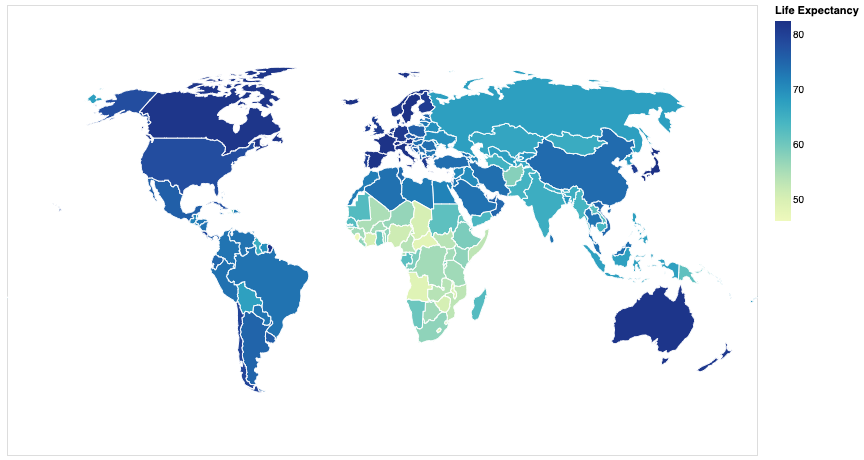

In [8]:
def make_plot_03_heat_map(df, colour):
    """Creates an Altair choropleth map
    
    Arguments:
        df {pd.DataFrame} -- Data frame containing the shaded values to plot and country information
        colour {str} -- The column to plot colour scale by (should be either: "life_expectancy", "gdp", or "gdp_log")
    
    Returns:
        altair.vegalite.v3.api.Chart -- Altair chart of world map with selected colour scale
    """    
    if colour == "life_expectancy":
        colour_title = "Life Expectancy"
    elif colour == "gdp":
        colour_title = "GDP (USD)"
    elif colour == "gdp_log":
        colour_title = "Log GDP (USD)"
        
    # country plotting data
    countries = alt.topo_feature(data.world_110m.url, 'countries')

    fig = alt.Chart(countries).mark_geoshape(
        fill='#666666',
        stroke='white'
    ).encode(
        alt.Color(colour + ":Q", title = colour_title),
        tooltip=[
            alt.Tooltip("country:N", title="Country"),
            alt.Tooltip("life_expectancy:Q", title="Life Expectancy", format='.2f'),
            alt.Tooltip("gdp:Q", title="GDP (USD)", format=".2f"),
            alt.Tooltip("gdp_log:Q", title="Log GDP (USD)", format=".2f")
        ]
    ).transform_lookup(
        lookup="id",
        from_=alt.LookupData(df, "numericCode", ["life_expectancy", "country", "gdp", "gdp_log"])
    ).properties(
        width=750,
        height=450
    ).project('naturalEarth1')
    
    return fig

make_plot_03_heat_map(df_map, "life_expectancy")

## Data integrity checks

Check to see if there are any countries where no code was found

In [9]:
df_map[df_map["numericCode"].notnull() == False]

,country,status,life_expectancy,gdp,gdp_log,numericCode


lookup the correct name of country

In [10]:
search_term = "tanzania"
world_info_df[world_info_df["name"].str.contains(search_term)]

,name,topLevelDomain,alpha2Code,alpha3Code,callingCodes,capital,altSpellings,region,subregion,population,latlng,demonym,area,gini,timezones,borders,nativeName,numericCode,currencies,languages,translations,flag,regionalBlocs,cioc
223,"tanzania, united republic of",[.tz],TZ,TZA,[255],Dodoma,"[TZ, United Republic of Tanzania, Jamhuri ya M...",Africa,Eastern Africa,55155000,"[-6.0, 35.0]",Tanzanian,945087.0,37.6,[UTC+03:00],"[BDI, COD, KEN, MWI, MOZ, RWA, UGA, ZMB]",Tanzania,834,"[{'code': 'TZS', 'name': 'Tanzanian shilling',...","[{'iso639_1': 'sw', 'iso639_2': 'swa', 'name':...","{'de': 'Tansania', 'es': 'Tanzania', 'fr': 'Ta...",https://restcountries.eu/data/tza.svg,"[{'acronym': 'AU', 'name': 'African Union', 'o...",TAN


## Examples

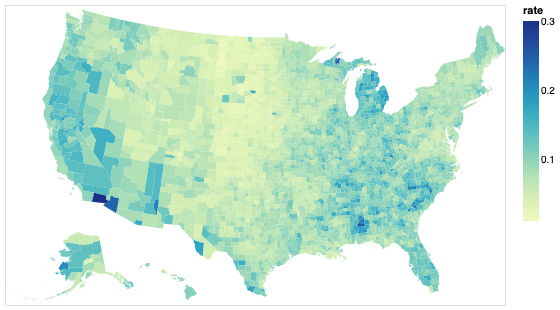

In [11]:
counties = alt.topo_feature(data.us_10m.url, 'counties')
source = data.unemployment.url

alt.Chart(counties).mark_geoshape().encode(
    color='rate:Q'
).transform_lookup(
    lookup='id',
    from_=alt.LookupData(source, 'id', ['rate'])
).project(
    type='albersUsa'
).properties(
    width=500,
    height=300
)


In [12]:
counties

UrlData({
  format: TopoDataFormat({
    feature: 'counties',
    type: 'topojson'
  }),
  url: 'https://vega.github.io/vega-datasets/data/us-10m.json'
})

In [13]:
pd.read_csv(data.unemployment.url, delimiter="\t")

,id,rate
0,1001,0.097
1,1003,0.091
2,1005,0.134
3,1007,0.121
4,1009,0.099
...,...,...
3213,72145,0.176
3214,72147,0.277
3215,72149,0.198
3216,72151,0.241


In [14]:
world = data.world_110m.url
world

'https://vega.github.io/vega-datasets/data/world-110m.json'

In [15]:
world_topo = data.world_110m()

In [16]:
world_topo.keys()

dict_keys(['type', 'transform', 'objects', 'arcs'])

In [17]:
world_topo

{'type': 'Topology',
 'transform': {'scale': [0.0036000360003600037, 0.0016925586033320111],
  'translate': [-180, -85.60903777459777]},
 'objects': {'land': {'type': 'MultiPolygon',
   'arcs': [[[0]],
    [[1]],
    [[2]],
    [[3]],
    [[4]],
    [[5]],
    [[6]],
    [[7, 8, 9]],
    [[10, 11]],
    [[12]],
    [[13]],
    [[14]],
    [[15]],
    [[16]],
    [[17]],
    [[18]],
    [[19]],
    [[20]],
    [[21]],
    [[22]],
    [[23]],
    [[24]],
    [[25]],
    [[26]],
    [[27]],
    [[28]],
    [[29, 30]],
    [[31]],
    [[32]],
    [[33]],
    [[34]],
    [[35]],
    [[36]],
    [[37]],
    [[38]],
    [[39]],
    [[40]],
    [[41]],
    [[42, 43]],
    [[44]],
    [[45]],
    [[46]],
    [[47, 48, 49, 50]],
    [[51]],
    [[52]],
    [[53]],
    [[54]],
    [[55]],
    [[56]],
    [[57]],
    [[58]],
    [[59]],
    [[60]],
    [[61]],
    [[62, 63]],
    [[64]],
    [[65]],
    [[66]],
    [[67]],
    [[68]],
    [[69]],
    [[70]],
    [[71]],
    [[72]],
    [[73]],
   

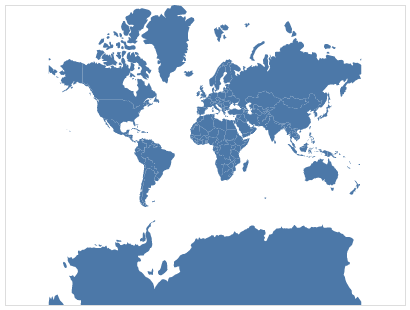

In [18]:
alt.Chart(alt.topo_feature(world, "countries")).mark_geoshape().encode(
    tooltip=[
        alt.Tooltip("id:N")
    ]
)

In [19]:
unemp = data.unemployment.url
unemp

'https://vega.github.io/vega-datasets/data/unemployment.tsv'

In [20]:
usa = data.us_10m.url
usa

'https://vega.github.io/vega-datasets/data/us-10m.json'

In [21]:
data.us_10m()

{'type': 'Topology',
 'transform': {'scale': [0.003589294092944858, 0.0005371535195261037],
  'translate': [-179.1473400003406, 17.67439566600018]},
 'objects': {'counties': {'type': 'GeometryCollection',
   'geometries': [{'type': 'MultiPolygon', 'arcs': [], 'id': 22051},
    {'type': None, 'id': 23023},
    {'type': None, 'id': 37031},
    {'type': None, 'id': 42045},
    {'type': 'Polygon',
     'arcs': [[0,
       1,
       2,
       3,
       4,
       5,
       6,
       7,
       8,
       9,
       10,
       11,
       12,
       13,
       14,
       15,
       16,
       17,
       18,
       19,
       20,
       21,
       22,
       23,
       24,
       25],
      [26],
      [27],
      [28],
      [29],
      [30],
      [31],
      [32],
      [33],
      [34],
      [35],
      [36],
      [37],
      [38],
      [39],
      [40],
      [41],
      [42],
      [43],
      [44],
      [45],
      [46],
      [47],
      [48],
      [49],
      [50],
      [51],
      

In [22]:
alt.topo_feature(usa, "counties")

UrlData({
  format: TopoDataFormat({
    feature: 'counties',
    type: 'topojson'
  }),
  url: 'https://vega.github.io/vega-datasets/data/us-10m.json'
})